<a href="https://colab.research.google.com/github/MiguelDiuza/Bases-de-datos-Celsa/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FALTANTE:

que la web cam reproduzca un audio despues de identificar la imagen. (ya identifica la imagen pero falta que reproduzca un audio)

que despues de reproducir el audio tome otra captura pasados 20segundos y esa captura se le entrega al modelo de abajo de reconocimiento facial

un algoritmo que segun la emocion asigne una etiqueta de entre 6 a la captura

pasarle la captura al ultimo modelo para que saque una imagen

(los modelos ya estan listos, solo falntan algoritmos sencillos que pasen imagenes de un modelo a aotro y un algoritmo que reproduzca un audio)

In [12]:
# Instalación de librerías
!pip install keras==2.4.3
!pip install tensorflow==2.4.1

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4.1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0)
ERROR: No matching distribution found for tensorflow==2.4.1


# Importaciones

In [16]:
# Importar las librerías necesarias
from google.colab import drive
import numpy as np
import cv2
import PIL
import io
import html
from base64 import b64decode
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import display, Javascript

# Creacion y entrenamiento de modelo
El modelo de deteccion de imagenes para saber a que lugar de colombia pertenece

In [17]:
# Montar Google Drive
drive.mount('/content/drive')

# Definir el directorio raíz que contiene las subcarpetas de imágenes
base_dir = '/content/drive/MyDrive/ProyPDI'

# Definir el generador de imágenes con rescale y validation split
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% para validación


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NameError: name 'ImageDataGenerator' is not defined

In [ ]:
# Generador para el conjunto de entrenamiento
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training')

# Generador para el conjunto de validación
validation_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation')

# Cargar el modelo base preentrenado
base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False

# Construir el modelo final
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


Found 47 images belonging to 3 classes.
Found 10 images belonging to 3 classes.


<ipython-input-3-871373fc5bac>:18: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Entrenar el modelo
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=10)

# Evaluar el modelo en el conjunto de validación
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Precisión en el conjunto de validación: {val_accuracy * 100:.2f}%')


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 24s 13s/step - accuracy: 0.5669 - loss: 2.4323 - val_accuracy: 0.8000 - val_loss: 3.8361
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 339ms/step - accuracy: 0.8344 - loss: 2.6810 - val_accuracy: 0.9000 - val_loss: 0.2610
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 167ms/step - accuracy: 0.9120 - loss: 0.7296 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.9291 - loss: 0.7165 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 180ms/step - accuracy: 0.9636 - loss: 0.1354 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step - accuracy: 0.9016 - loss: 0.6030 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 1.0000 - loss: 5.0727e-09 - val_accuracy: 1.0000

In [ ]:
!pip install pydub
!apt-get install -y ffmpeg


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


# Uso de la web cam
Aqui usamos la web cam para que detecte las imegenes que se le muestren entre las diferentes zonas de colombia (falta que se reproduzca el audio correspondiente y tome una captura a los 20 segundos)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

Imagen guardada como capturas/captura_20241112_054628.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


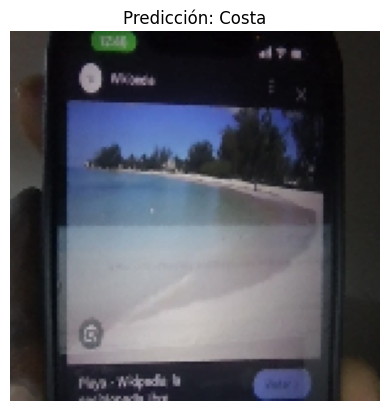

In [ ]:
from google.colab import output
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
import base64
from datetime import datetime
from IPython.display import display, Javascript, Audio
import time

# Asegúrate de montar Google Drive en Colab
from google.colab import drive
drive.mount('/content/drive')

# Función para cargar y preprocesar la imagen capturada
def cargar_imagen_ruta(ruta_imagen):
    img = image.load_img(ruta_imagen, target_size=(150, 150))  # Redimensionar a 150x150
    img_array = image.img_to_array(img)  # Convertir la imagen a un array de numpy
    img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión extra para que sea compatible con el modelo
    img_array = img_array / 255.0  # Normalizar la imagen (los valores deben estar entre 0 y 1)

    return img, img_array

# Función para predecir la clase de la imagen
def predecir_imagen(ruta_imagen):
    img, img_array = cargar_imagen_ruta(ruta_imagen)

    # Realizar la predicción con el modelo
    prediccion = model.predict(img_array)

    # Obtener el índice de la clase con la mayor probabilidad
    clase_index = np.argmax(prediccion[0])

    # Mapear el índice a la clase correspondiente
    clases = ['Costa', 'Tatacoa', 'ValleDelCauca']  # Asegúrate que estas clases son las mismas que usaste en el entrenamiento
    clase_predicha = clases[clase_index]

    # Mostrar la imagen y la predicción
    plt.imshow(img)
    plt.title(f'Predicción: {clase_predicha}')
    plt.axis('off')  # Desactivar los ejes
    plt.show()

    return clase_predicha

# Función para guardar la imagen y pasar por el proceso de predicción
def save_and_predict(image_data):
    # Decodificar la imagen base64
    image_data = image_data.split(',')[1]
    image_bytes = base64.b64decode(image_data)

    # Crear la carpeta de capturas si no existe
    if not os.path.exists('capturas'):
        os.makedirs('capturas')

    # Guardar la imagen con nombre único basado en la fecha y hora
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    image_filename = f'capturas/captura_{timestamp}.jpg'

    # Guardar la imagen en el archivo
    with open(image_filename, 'wb') as f:
        f.write(image_bytes)

    print(f"Imagen guardada como {image_filename}")

    # Realizar la predicción de la imagen guardada
    clase_predicha = predecir_imagen(image_filename)

    # Reproducir el MP3 correspondiente
    reproducir_mp3(clase_predicha)

    return clase_predicha

# Función para reproducir el MP3 correspondiente (solo 30 segundos)
def reproducir_mp3(clase_predicha):
    # Definir las rutas de los archivos MP3
    mp3_path = {
        'Costa': '/content/drive/MyDrive/musicPDI/Costa/costa.mp3',
        'Tatacoa': '/content/drive/MyDrive/musicPDI/Tatacoa/tatacoa.mp3',
        'ValleDelCauca': '/content/drive/MyDrive/musicPDI/Valle/valle.mp3'
    }

    # Cargar el archivo MP3 y reproducirlo usando Audio
    if clase_predicha in mp3_path:
        mp3_file = mp3_path[clase_predicha]

        # Crear un widget de audio con un botón de play
        audio_widget = Audio(mp3_file, autoplay=False, duration=30)  # Inicia el audio, pero sin autoplay

        # Mostrar el widget de audio
        display(audio_widget)

        # Crear el botón de reproducción manual
        play_button = display(Javascript('document.querySelector("audio").play();'))

        # Esperar hasta que los 30 segundos del audio terminen
        time.sleep(30)

        print("Audio terminado.")
        play_button  # Para controlar la reproducción del audio

# Función JavaScript para capturar y enviar la imagen
def video_stream():
    js = Javascript('''
    var video;
    var stream;
    var canvas;
    var context;

    function startCamera() {
        video = document.createElement('video');
        video.setAttribute('playsinline', '');
        video.style.width = "640px"; // Cambia el tamaño según tus necesidades
        document.body.appendChild(video);

        navigator.mediaDevices.getUserMedia({video: true}).then(function(s) {
            stream = s;
            video.srcObject = stream;
            video.play();

            // Crear un canvas para capturar una imagen
            canvas = document.createElement('canvas');
            context = canvas.getContext('2d');
        }).catch(function(err) {
            console.log("An error occurred: " + err);
        });
    }

    function captureImage() {
        // Establecer el tamaño del canvas igual al tamaño del video
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;

        // Dibujar el fotograma actual del video en el canvas
        context.drawImage(video, 0, 0, canvas.width, canvas.height);

        // Convertir la imagen del canvas a base64
        var imageData = canvas.toDataURL('image/jpeg');

        // Enviar la imagen al backend (Python)
        google.colab.kernel.invokeFunction('notebook.save_and_predict', [imageData], {});
    }

    function stopCamera() {
        stream.getTracks().forEach(track => track.stop());
        video.pause();
        video.srcObject = null;
        document.body.removeChild(video);
    }

    // Crear un botón para capturar la imagen
    var button = document.createElement('button');
    button.innerHTML = "Capturar Imagen";
    button.onclick = captureImage;
    document.body.appendChild(button);

    // Crear un botón para detener la cámara
    var stopButton = document.createElement('button');
    stopButton.innerHTML = "Detener Cámara";
    stopButton.onclick = stopCamera;
    document.body.appendChild(stopButton);

    startCamera();
    ''')

    display(js)

# Registrar la función de Python en el entorno de JavaScript
output.register_callback('notebook.save_and_predict', save_and_predict)

# Iniciar la transmisión de video y mostrar los botones
video_stream()


aqui tengo otra opción que puede reemplazar la de arriba, ya que reproduce el audio automáticamente al detectar la imagen, captura la imagen 10 segundos despues de que el audio empiece, de ahi passa esa imagen capturada al detector de emociones existente, aplica el estilo artistico basado en la emocion detectada.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

Imagen guardada como capturas/captura_20241112_054334.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


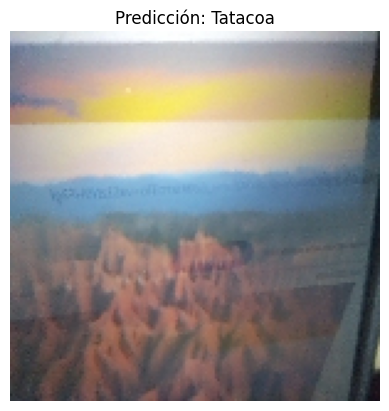

In [ ]:
from google.colab import output
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
import base64
from datetime import datetime
from IPython.display import display, Javascript, Audio
import time

# Asegúrate de montar Google Drive en Colab
from google.colab import drive
drive.mount('/content/drive')

# Función para cargar y preprocesar la imagen capturada
def cargar_imagen_ruta(ruta_imagen):
    img = image.load_img(ruta_imagen, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    return img, img_array

# Función para predecir la clase de la imagen
def predecir_imagen(ruta_imagen):
    img, img_array = cargar_imagen_ruta(ruta_imagen)

    # Realizar la predicción con el modelo
    prediccion = model.predict(img_array)

    # Obtener el índice de la clase con la mayor probabilidad
    clase_index = np.argmax(prediccion[0])

    # Mapear el índice a la clase correspondiente
    clases = ['Costa', 'Tatacoa', 'ValleDelCauca']
    clase_predicha = clases[clase_index]

    # Mostrar la imagen y la predicción
    plt.imshow(img)
    plt.title(f'Predicción: {clase_predicha}')
    plt.axis('off')
    plt.show()

    return clase_predicha

# Función para guardar la imagen y pasar por el proceso de predicción
def save_and_predict(image_data):
    image_data = image_data.split(',')[1]
    image_bytes = base64.b64decode(image_data)

    if not os.path.exists('capturas'):
        os.makedirs('capturas')

    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    image_filename = f'capturas/captura_{timestamp}.jpg'

    with open(image_filename, 'wb') as f:
        f.write(image_bytes)

    print(f"Imagen guardada como {image_filename}")

    clase_predicha = predecir_imagen(image_filename)

    # Llamar a la siguiente parte para reproducir el audio y continuar el flujo
    reproducir_mp3(clase_predicha)

    return clase_predicha

# Iniciar la transmisión de video y mostrar los botones
def video_stream():
    js = Javascript('''
    var video;
    var stream;
    var canvas;
    var context;

    function startCamera() {
        video = document.createElement('video');
        video.setAttribute('playsinline', '');
        video.style.width = "640px";
        document.body.appendChild(video);

        navigator.mediaDevices.getUserMedia({video: true}).then(function(s) {
            stream = s;
            video.srcObject = stream;
            video.play();
            canvas = document.createElement('canvas');
            context = canvas.getContext('2d');
        }).catch(function(err) {
            console.log("An error occurred: " + err);
        });
    }

    function captureImage() {
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        context.drawImage(video, 0, 0, canvas.width, canvas.height);
        var imageData = canvas.toDataURL('image/jpeg');
        google.colab.kernel.invokeFunction('notebook.save_and_predict', [imageData], {});
    }

    function stopCamera() {
        stream.getTracks().forEach(track => track.stop());
        video.pause();
        video.srcObject = null;
        document.body.removeChild(video);
    }

    var button = document.createElement('button');
    button.innerHTML = "Capturar Imagen";
    button.onclick = captureImage;
    document.body.appendChild(button);

    var stopButton = document.createElement('button');
    stopButton.innerHTML = "Detener Cámara";
    stopButton.onclick = stopCamera;
    document.body.appendChild(stopButton);

    startCamera();
    ''')

    display(js)

# Llamar a la función para iniciar la transmisión de video
video_stream()

en este espacio de aqui hay que reproducir un audio segun la deteccion de la imagen de arriba, al reproducir y transcurrido 10 segundos toma una captura como con la funcion de arriba y esa imagen se pasa por un detector de emociones (ya esta pero en otor colab) y segun la emocion se mezcla con un estilo artistico con las funciones que estan aqui abajo

falta:

1 que reproduzca el audio al detectar la imagen
2 que capture a los 10 segundos la imagen despues del audio (ya esta la funcion que captura)
3 pasarle esa imagen a la funcion de abajo
4 configurar la funcion de abajo para que segun la emocion de la captura use una imgen diferente de arte (es breve)

In [ ]:
# Función para reproducir el MP3 correspondiente (solo 30 segundos) y capturar después de 10 segundos
def reproducir_mp3(clase_predicha):
    # Definir las rutas de los archivos MP3
    mp3_path = {
        'Costa': '/content/drive/MyDrive/musicPDI/Costa/costa.mp3',
        'Tatacoa': '/content/drive/MyDrive/musicPDI/Tatacoa/tatacoa.mp3',
        'ValleDelCauca': '/content/drive/MyDrive/musicPDI/Valle/valle.mp3'
    }

    # Cargar el archivo MP3 y reproducirlo usando Audio
    if clase_predicha in mp3_path:
        mp3_file = mp3_path[clase_predicha]

        # Crear un widget de audio con autoplay activado y duración de 30 segundos
        audio_widget = Audio(mp3_file, autoplay=True, duration=30)

        # Mostrar el widget de audio para iniciar la reproducción
        display(audio_widget)

        # Esperar 10 segundos antes de capturar la imagen
        time.sleep(10)

        # Capturar la imagen automáticamente para el detector de emociones
        capture_emotion_image()

        print("Captura de imagen realizada a los 10 segundos del audio.")

# Nueva función para capturar una imagen para el detector de emociones
def capture_emotion_image():
    js = Javascript('''
    var video = document.querySelector('video');
    var canvas = document.createElement('canvas');
    var context = canvas.getContext('2d');

    canvas.width = video.videoWidth;
    canvas.height = video.videoHeight;

    context.drawImage(video, 0, 0, canvas.width, canvas.height);

    var imageData = canvas.toDataURL('image/jpeg');

    // Enviar la imagen al backend para detectar emociones
    google.colab.kernel.invokeFunction('notebook.process_emotion_image', [imageData], {});
    ''')
    display(js)

# Función para procesar la imagen capturada para el detector de emociones
def process_emotion_image(image_data):
    # Decodificar la imagen base64
    image_data = image_data.split(',')[1]
    image_bytes = base64.b64decode(image_data)

    # Guardar la imagen temporalmente
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    image_filename = f'capturas/emotion_captura_{timestamp}.jpg'

    if not os.path.exists('capturas'):
        os.makedirs('capturas')

    with open(image_filename, 'wb') as f:
        f.write(image_bytes)

    print(f"Imagen guardada como {image_filename}")

    # Pasar la imagen al detector de emociones
    emotion = detectar_emocion(image_filename)

    # Aplicar estilo artístico según la emoción detectada
    aplicar_estilo_artistico(image_filename, emotion)

# Función para detectar la emoción (esta parte debería integrarse con tu otro Colab)
def detectar_emocion(ruta_imagen):
    # Aquí puedes integrar la lógica para tu detector de emociones ya existente
    emocion = "positivo"  # Suponiendo que tenemos dos emociones: 'positivo' o 'negativo'
    return emocion

# Función para aplicar un estilo artístico basado en la emoción detectada
def aplicar_estilo_artistico(ruta_imagen, emocion):
    # Definir rutas de imágenes artísticas según la emoción
    estilo_arte = {
        'positivo': '/content/drive/MyDrive/art_styles/positivo.jpg',
        'negativo': '/content/drive/MyDrive/art_styles/negativo.jpg'
    }

    if emocion in estilo_arte:
        estilo_imagen = estilo_arte[emocion]

        # Aplicar el estilo artístico (esto es solo un ejemplo, deberías integrar la técnica que estés usando)
        print(f"Aplicando estilo {emocion} usando la imagen {estilo_imagen}")

# Registrar la función de Python en el entorno de JavaScript para detectar emociones
output.register_callback('notebook.process_emotion_image', process_emotion_image)

# Aqui comienza la deteccion de emociones:

In [ ]:
!git clone https://github.com/DavidReveloLuna/Face_Emotion.git

fatal: destination path 'Face_Emotion' already exists and is not an empty directory.


In [ ]:
# Descomprimimos el dataset en la carpeta content
!unrar x -Y "/content/Face_Emotion/images.rar" "/content/"

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Extracting  /content/images/train/neutral/4798.jpg                        55%  OK 
Extracting  /content/images/train/neutral/4799.jpg                        55%  OK 
Extracting  /content/images/train/neutral/482.jpg                         55%  OK 
Extracting  /content/images/train/neutral/4820.jpg                        55%  OK 
Extracting  /content/images/train/neutral/4822.jpg                        55%  OK 
Extracting  /content/images/train/neutral/4836.jpg                        55%  OK 
Extracting  /content/images/train/neutral/4845.jpg                        55%  OK 
Extracting  /content/images/train/neutral/4856.jpg                        55%  OK 
Extracting  /content/images/train/neutral/4867.jpg                        55%  OK 
Extracting  /content/images/train/neutral/4873.jpg                        55%  OK 
Extracting  /

In [ ]:
# Definimos las rutas del dataset
train_data_dir = '/content/images/train'
val_data_dir = '/content/images/validation'

In [ ]:
!pip uninstall tensorflow
!pip install tensorflow

Found existing installation: tensorflow 2.17.0
Uninstalling tensorflow-2.17.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.17.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Definimos algunos parámetros importantes
width_shape = 48
height_shape = 48
num_classes = 7
epochs = 10
batch_size = 32
class_names = ['angry','disgust','fear','happy','neutral','sad','surprise']

# Configuramos el dataset de entrenamiento y validación
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',shuffle=True)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',shuffle=True)



In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input, AveragePooling2D,Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

## Extracción de Características
model.add(Conv2D(32,(3,3),padding = 'same',input_shape = (width_shape,height_shape,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout (0.2))

model.add(Conv2D(128,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout (0.2))

model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

## Clasificación
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

# Revisamos el modelo CNN
model.summary()

# Compilamos y estamos listos para el entrenamiento
opt = Adam(learning_rate=1e-4, decay=1e-4 / epochs)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
# Configuración Tensorboard
from tensorflow.keras.callbacks import TensorBoard
import datetime, os

%load_ext tensorboard

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

In [ ]:
# Entrenamiento de la red
model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    steps_per_epoch=train_generator.n//batch_size,
    validation_steps=val_generator.n//batch_size,
    callbacks=[tensorboard_callback])


In [ ]:
%tensorboard --logdir logs

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

faces = []

# Cargamos una imagen del directorio
imaget_path = "/content/images/validation/surprise/10185.jpg"

# Redimensionamos la imagen y convertimos a gray
face = cv2.cvtColor(cv2.imread(imaget_path), cv2.COLOR_BGR2GRAY)
face = cv2.resize(face, (48, 48))
face2 = img_to_array(face)
face2 = np.expand_dims(face2,axis=0)

faces.append(face2)

# El modelo estima la predicción
preds = model.predict(faces)

print(class_names[np.argmax(preds)])
plt.imshow(cv2.cvtColor(np.asarray(face),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.models import load_model
import numpy as np

# Configuración del dataset de validación sin shuffle
val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',shuffle=False)

predictions = model.predict(val_generator)
y_pred = np.argmax(predictions, axis=1)
y_real = val_generator.classes

matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(5,5), show_normed=False)
plt.tight_layout()

print(metrics.classification_report(y_real,y_pred, digits = 4))

# Aqui debe ir un algoritmo que segun la emocion detectada le asigne una imagen de estilo(pendiente)

In [ ]:
# Función para detectar la emoción (parte del flujo principal)
def detectar_emocion(ruta_imagen):
    # Aquí utilizamos el modelo entrenado para detectar emociones (asumiendo que ya fue cargado)
    face = cv2.cvtColor(cv2.imread(ruta_imagen), cv2.COLOR_BGR2GRAY)
    face = cv2.resize(face, (48, 48))
    face_array = img_to_array(face)
    face_array = np.expand_dims(face_array, axis=0)

    # Predicción con el modelo
    preds = model.predict(face_array)
    emocion = class_names[np.argmax(preds)]  # Emoción detectada

    print(f"Emoción detectada: {emocion}")

    # Llamar a la función para aplicar el estilo artístico según la emoción
    aplicar_estilo_artistico(ruta_imagen, emocion)

    return emocion

# Función para aplicar un estilo artístico basado en la emoción detectada
def aplicar_estilo_artistico(ruta_imagen, emocion):
    # Definir las rutas de imágenes artísticas según la emoción detectada
    estilo_arte = {
        'angry': '/content/drive/MyDrive/art_styles/angry_style.jpg',
        'disgust': '/content/drive/MyDrive/art_styles/disgust_style.jpg',
        'fear': '/content/drive/MyDrive/art_styles/fear_style.jpg',
        'happy': '/content/drive/MyDrive/art_styles/happy_style.jpg',
        'neutral': '/content/drive/MyDrive/art_styles/neutral_style.jpg',
        'sad': '/content/drive/MyDrive/art_styles/sad_style.jpg',
        'surprise': '/content/drive/MyDrive/art_styles/surprise_style.jpg'
    }

    if emocion in estilo_arte:
        estilo_imagen = estilo_arte[emocion]

        # Mostrar la imagen original y la imagen del estilo artístico que se va a aplicar
        print(f"Aplicando el estilo artístico basado en la emoción detectada: {emocion}")

        # Cargar la imagen original
        original_image = cv2.imread(ruta_imagen)
        plt.figure(figsize=(10, 5))

        # Mostrar la imagen original
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.title("Imagen Original")
        plt.axis('off')

        # Mostrar la imagen del estilo artístico correspondiente
        estilo_image = cv2.imread(estilo_imagen)
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(estilo_image, cv2.COLOR_BGR2RGB))
        plt.title(f"Estilo Artístico - {emocion.capitalize()}")
        plt.axis('off')

        plt.show()

        # Aquí podrías añadir la lógica para realizar una fusión o transferencia de estilo,
        # por ejemplo utilizando alguna técnica de transferencia de estilo neuronal.

# Ejemplo de uso: detectar emoción y aplicar estilo artístico
# Esta función sería llamada después de capturar la imagen automáticamente.
def process_emotion_image(image_data):
    # Decodificar la imagen base64
    image_data = image_data.split(',')[1]
    image_bytes = base64.b64decode(image_data)

    # Guardar la imagen temporalmente
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    image_filename = f'capturas/emotion_captura_{timestamp}.jpg'

    if not os.path.exists('capturas'):
        os.makedirs('capturas')

    with open(image_filename, 'wb') as f:
        f.write(image_bytes)

    print(f"Imagen guardada como {image_filename}")

    # Pasar la imagen al detector de emociones y aplicar estilo
    detectar_emocion(image_filename)

# Procesamiento de la captura para sacar pintura

Este algoritmo con una imagen de estilo y la captura crea una obra de arte

In [ ]:
# Importar las bibliotecas necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Función para cargar y redimensionar la imagen
def load_and_resize_image(path, size=(512, 512)):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
    img = cv2.resize(img, size)
    return img

# Función para aplicar la Transformada Rápida de Fourier y filtrar frecuencias
def apply_fft(img):
    # Convertir la imagen a float y aplicar FFT
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)  # Centrar las frecuencias

    # Magnitud y fase
    magnitude = np.abs(fshift)
    phase = np.angle(fshift)

    return magnitude, phase

# Función para combinar magnitudes y fases
def combine_frequency(magnitude1, phase1, magnitude2, phase2):
    # Combinar magnitudes (puedes ajustar el peso aquí)
    combined_magnitude = np.sqrt(magnitude1**2 + magnitude2**2)  # O usar una combinación diferente
    combined_phase = phase1  # Usar la fase de la imagen de contenido

    # Reconstruir la imagen usando la magnitud combinada y la fase original
    combined = combined_magnitude * np.exp(1j * combined_phase)
    combined_img = np.fft.ifft2(np.fft.ifftshift(combined)).real
    return combined_img

# Función para convertir una imagen a escala de grises
def to_grayscale(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)  # Convertir de RGB a escala de grises
    return gray

# Función para transferir los tonos de la imagen de estilo a la imagen en escala de grises
def color_transfer(gray_img, style_img):
    # Convertir la imagen en escala de grises a 3 canales para igualar la forma del estilo
    gray_img_3ch = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB)

    # Aplicar la transferencia de color usando el modelo LAB
    gray_lab = cv2.cvtColor(gray_img_3ch, cv2.COLOR_RGB2LAB)
    style_lab = cv2.cvtColor(style_img, cv2.COLOR_RGB2LAB)

    # Tomar solo el canal de luminancia (L) de la imagen en escala de grises y
    # reemplazar los canales A y B con los de la imagen de estilo
    combined_lab = gray_lab.copy()
    combined_lab[:, :, 1] = style_lab[:, :, 1]  # Canal A
    combined_lab[:, :, 2] = style_lab[:, :, 2]  # Canal B

    # Convertir de nuevo a RGB
    combined_rgb = cv2.cvtColor(combined_lab, cv2.COLOR_LAB2RGB)
    return combined_rgb

# Cargar las imágenes
content_path = '/content/drive/MyDrive/pruebas/imagen1.jpg'  # Cambia esto a la ruta de tu imagen de contenido
style_path = '/content/drive/MyDrive/pruebas/art.jpg'  # Ruta de la imagen de estilo

content_img = load_and_resize_image(content_path)
style_img = load_and_resize_image(style_path)

# Aplicar FFT a ambas imágenes
magnitude_content, phase_content = apply_fft(content_img)
magnitude_style, phase_style = apply_fft(style_img)

# Combinar las frecuencias
combined_img = combine_frequency(magnitude_content, phase_content, magnitude_style, phase_style)

# Normalizar la imagen combinada
combined_img = np.clip(combined_img, 0, 255).astype(np.uint8)

# Convertir la imagen combinada a escala de grises
gray_combined_img = to_grayscale(combined_img)

# Transferir los tonos de la imagen de estilo a la imagen en escala de grises
colorized_img = color_transfer(gray_combined_img, style_img)

# Función para mostrar las imágenes
def show_images(content, style, combined, gray, colorized):
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 5, 1)
    plt.imshow(content)
    plt.title('Imagen de Contenido')
    plt.axis('off')

    plt.subplot(1, 5, 2)
    plt.imshow(style)
    plt.title('Imagen de Estilo')
    plt.axis('off')

    plt.subplot(1, 5, 3)
    plt.imshow(combined)
    plt.title('Imagen Combinada')
    plt.axis('off')

    plt.subplot(1, 5, 4)
    plt.imshow(gray, cmap='gray')
    plt.title('Imagen en Escala de Grises')
    plt.axis('off')

    plt.subplot(1, 5, 5)
    plt.imshow(colorized)
    plt.title('Imagen Recolorizada')
    plt.axis('off')

    plt.show()

# Mostrar los resultados
show_images(content_img, style_img, combined_img, gray_combined_img, colorized_img)



# que la web cam reproduzca un audio despues de identificar la imagen. (ya identifica la imagen pero falta que reproduzca un audio) que despues de reproducir el audio tome otra captura pasados 20segundos y esa captura se le entrega al modelo de abajo de reconocimiento facial

In [ ]:
```python
from google.colab import drive
import numpy as np
import cv2
import PIL
import io
import html
from base64 import b64decode
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from IPython.display import display, Javascript
from google.colab import output
import os
import matplotlib.pyplot as plt
import base64
from datetime import datetime
from IPython.display import display, Javascript, Audio
import time
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input, AveragePooling2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
!pip install pydub
!apt-get install -y ffmpeg

# # Uso de la web cam
# Aqui usamos la web cam para que detecte las imegenes que se le muestren entre las diferentes zonas de colombia (falta que se reproduzca el audio correspondiente y tome una captura a los 20 segundos)

# Asegúrate de montar Google Drive en Colab
drive.mount('/content/drive')

# Función para cargar y preprocesar la imagen capturada
def cargar_imagen_ruta(ruta_imagen):
    img = image.load_img(ruta_imagen, target_size=(150, 150))  # Redimensionar a 150x150
    img_array = image.img_to_array(img)  # Convertir la imagen a un array de numpy
    img_array = np.expand_dims(img_array, axis=0)  # Añadir una dimensión extra para que sea compatible con el modelo
    img_array = img_array / 255.0  # Normalizar la imagen (los valores deben estar entre 0 y 1)

    return img, img_array

# Función para predecir la clase de la imagen
def predecir_imagen(ruta_imagen):
    img, img_array = cargar_imagen_ruta(ruta_imagen)

    # Realizar la predicción con el modelo
    prediccion = model.predict(img_array)

    # Obtener el índice de la clase con la mayor probabilidad
    clase_index = np.argmax(prediccion[0])

    # Mapear el índice a la clase correspondiente
    clases = ['Costa', 'Tatacoa', 'ValleDelCauca']  # Asegúrate que estas clases son las mismas que usaste en el entrenamiento
    clase_predicha = clases[clase_index]

    # Mostrar la imagen y la predicción
    plt.imshow(img)
    plt.title(f'Predicción: {clase_predicha}')
    plt.axis('off')  # Desactivar los ejes
    plt.show()

    return clase_predicha

# Función para guardar la imagen y pasar por el proceso de predicción
def save_and_predict(image_data):
    # Decodificar la imagen base64
    image_data = image_data.split(',')[1]
    image_bytes = base64.b64decode(image_data)

    # Crear la carpeta de capturas si no existe
    if not os.path.exists('capturas'):
        os.makedirs('capturas')

    # Guardar la imagen con nombre único basado en la fecha y hora
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    image_filename = f'capturas/captura_{timestamp}.jpg'

    # Guardar la imagen en el archivo
    with open(image_filename, 'wb') as f:
        f.write(image_bytes)

    print(f"Imagen guardada como {image_filename}")

    # Realizar la predicción de la imagen guardada
    clase_predicha = predecir_imagen(image_filename)

    # Reproducir el MP3 correspondiente
    reproducir_mp3(clase_predicha)

    #Tomar una captura a los 20 segundos
    time.sleep(20)
    capture_image_after_audio()

    return clase_predicha

# Función para reproducir el MP3 correspondiente (solo 30 segundos)
def reproducir_mp3(clase_predicha):
    # Definir las rutas de los archivos MP3
    mp3_path = {
        'Costa': '/content/drive/MyDrive/musicPDI/Costa/costa.mp3',
        'Tatacoa': '/content/drive/MyDrive/musicPDI/Tatacoa/tatacoa.mp3',
        'ValleDelCauca': '/content/drive/MyDrive/musicPDI/Valle/valle.mp3'
    }

    # Cargar el archivo MP3 y reproducirlo usando Audio
    if clase_predicha in mp3_path:
        mp3_file = mp3_path[clase_predicha]

        # Crear un widget de audio con un botón de play
        audio_widget = Audio(mp3_file, autoplay=False, duration=30)  # Inicia el audio, pero sin autoplay

        # Mostrar el widget de audio
        display(audio_widget)

        # Crear el botón de reproducción manual
        play_button = display(Javascript('document.querySelector("audio").play();'))

        # Esperar hasta que los 30 segundos del audio terminen
        # time.sleep(30)

        print("Audio terminado.")
        play_button  # Para controlar la reproducción del audio

# Función JavaScript para capturar y enviar la imagen
def video_stream():
    js = Javascript('''
    var video;
    var stream;
    var canvas;
    var context;

    function startCamera() {
        video = document.createElement('video');
        video.setAttribute('playsinline', '');
        video.style.width = "640px"; // Cambia el tamaño según tus necesidades
        document.body.appendChild(video);

        navigator.mediaDevices.getUserMedia({video: true}).then(function(s) {
            stream = s;
            video.srcObject = stream;
            video.play();

            // Crear un canvas para capturar una imagen
            canvas = document.createElement('canvas');
            context = canvas.getContext('2d');
        }).catch(function(err) {
            console.log("An error occurred: " + err);
        });
    }

    function captureImage() {
        // Establecer el tamaño del canvas igual al tamaño del video
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;

        // Dibujar el fotograma actual del video en el canvas
        context.drawImage(video, 0, 0, canvas.width, canvas.height);

        // Convertir la imagen del canvas a base64
        var imageData = canvas.toDataURL('image/jpeg');

        // Enviar la imagen al backend (Python)
        google.colab.kernel.invokeFunction('notebook.save_and_predict', [imageData], {});
    }

    function capture_image_after_audio() {
      // Establecer el tamaño del canvas igual al tamaño del video
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;

      // Dibujar el fotograma actual del video en el canvas
      context.drawImage(video, 0, 0, canvas.width, canvas.height);

      // Convertir la imagen del canvas a base64
      var imageData = canvas.toDataURL('image/jpeg');

      // Enviar la imagen al backend (Python)
      google.colab.kernel.invokeFunction('notebook.procesar_captura_emociones', [imageData], {});
    }

    function stopCamera() {
        stream.getTracks().forEach(track => track.stop());
        video.pause();
        video.srcObject = null;
        document.body.removeChild(video);
    }

    // Crear un botón para capturar la imagen
    var button = document.createElement('button');
    button.innerHTML = "Capturar Imagen";
    button.onclick = captureImage;
    document.body.appendChild(button);

    // Crear un botón para detener la cámara
    var stopButton = document.createElement('button');
    stopButton.innerHTML = "Detener Cámara";
    stopButton.onclick = stopCamera;
    document.body.appendChild(stopButton);

    startCamera();
    ''')

    display(js)

# Registrar la función de Python en el entorno de JavaScript
output.register_callback('notebook.save_and_predict', save_and_predict)
output.register_callback('notebook.procesar_captura_emociones', procesar_captura_emociones)

# Iniciar la transmisión

In [ ]:
def procesar_captura_emociones(image_data):
    # Decodificar la imagen base64
    image_data = image_data.split(',')[1]
    image_bytes = base64.b64decode(image_data)

    # Crear la carpeta de capturas si no existe
    if not os.path.exists('capturas_emociones'):
        os.makedirs('capturas_emociones')

    # Guardar la imagen con nombre único basado en la fecha y hora
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    image_filename = f'capturas_emociones/captura_{timestamp}.jpg'

    # Guardar la imagen en el archivo
    with open(image_filename, 'wb') as f:
        f.write(image_bytes)

    print(f"Imagen guardada como {image_filename}")

    # Aquí puedes llamar a tu modelo de reconocimiento de emociones
    # Por ejemplo:
    # emocion_detectada = reconocer_emocion(image_filename)

    # Procesamiento de la captura para sacar pintura
    content_path = image_filename  # Cambia esto a la ruta de tu imagen de contenido
    style_path = '/content/drive/MyDrive/pruebas/art.jpg'  # Ruta de la imagen de estilo

    content_img = load_and_resize_image(content_path)
    style_img = load_and_resize_image(style_path)

    # Aplicar FFT a ambas imágenes
    magnitude_content, phase_content = apply_fft(content_img)
    magnitude_style, phase_style = apply_fft(style_img)

    # Combinar las frecuencias
    combined_img = combine_frequency(magnitude_content, phase_content, magnitude_style, phase_style)

    # Normalizar la imagen combinada
    combined_img = np.clip(combined_img, 0, 255).astype(np.uint8)

    # Convertir la imagen combinada a escala de grises
    gray_combined_img = to_grayscale(combined_img)

    # Transferir los tonos de la imagen de estilo a la imagen en escala de grises
    colorized_img = color_transfer(gray_combined_img, style_img)

    # Mostrar los resultados
    show_images(content_img, style_img, combined_img, gray_combined_img, colorized_img)

    #
    # # Aquí debes implementar la lógica para asignar una etiqueta de 1 a 6
    # # según la emoción detectada. Puedes usar un diccionario o un condicional.
    # # Por ejemplo:
    #
    # # emocion_detectada = 'happy'
    # # if emocion_detectada == 'happy':
    # #     etiqueta = 1
    # # elif emocion_detectada == 'sad':
    # #     etiqueta = 2
    # # # ...
    # # print(etiqueta)
    #
    # # Luego, según la etiqueta, puedes pasar la imagen al modelo correspondiente y generar una nueva imagen.
    # # También puedes reproducir un audio según la etiqueta.

def capture_image_after_audio():
    video_stream()



video_stream()

otra opción

In [ ]:
from google.colab import output
from IPython.display import display, Javascript, Audio
import time
import base64
from datetime import datetime
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

# Función para guardar la imagen y pasar por el proceso de predicción
def save_and_predict(image_data):
    # Decodificar la imagen base64
    image_data = image_data.split(',')[1]
    image_bytes = base64.b64decode(image_data)

    if not os.path.exists('capturas'):
        os.makedirs('capturas')

    # Guardar la imagen capturada
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    image_filename = f'capturas/captura_{timestamp}.jpg'

    with open(image_filename, 'wb') as f:
        f.write(image_bytes)

    print(f"Imagen guardada como {image_filename}")

    # Aquí debería ir la predicción de la imagen (se omite ya que mencionaste que ya estaba implementada)
    # En su lugar se asume una clase predicha como ejemplo
    clase_predicha = 'Costa'  # Simulación del resultado de predicción

    # Reproducir el audio correspondiente a la clase predicha
    reproducir_mp3_y_capturar(clase_predicha)

# Función para reproducir el MP3 correspondiente y capturar después de 20 segundos
def reproducir_mp3_y_capturar(clase_predicha):
    # Definir las rutas de los archivos MP3
    mp3_path = {
        'Costa': '/content/drive/MyDrive/musicPDI/Costa/costa.mp3',
        'Tatacoa': '/content/drive/MyDrive/musicPDI/Tatacoa/tatacoa.mp3',
        'ValleDelCauca': '/content/drive/MyDrive/musicPDI/Valle/valle.mp3'
    }

    # Reproducir el audio correspondiente
    if clase_predicha in mp3_path:
        mp3_file = mp3_path[clase_predicha]
        audio_widget = Audio(mp3_file, autoplay=True, duration=30)
        display(audio_widget)

        # Esperar 20 segundos para capturar la imagen mientras se reproduce el audio
        time.sleep(20)

        # Capturar la imagen automáticamente para el detector de emociones
        capture_emotion_image()

# Nueva función para capturar una imagen para el detector de emociones
def capture_emotion_image():
    js = Javascript('''
    var video = document.querySelector('video');
    var canvas = document.createElement('canvas');
    var context = canvas.getContext('2d');

    canvas.width = video.videoWidth;
    canvas.height = video.videoHeight;

    context.drawImage(video, 0, 0, canvas.width, canvas.height);

    var imageData = canvas.toDataURL('image/jpeg');

    // Enviar la imagen al backend para el análisis de emociones
    google.colab.kernel.invokeFunction('notebook.process_emotion_image', [imageData], {});
    ''')
    display(js)

# Función para procesar la imagen capturada para el detector de emociones
def process_emotion_image(image_data):
    # Decodificar la imagen base64
    image_data = image_data.split(',')[1]
    image_bytes = base64.b64decode(image_data)

    # Guardar la imagen temporalmente
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    image_filename = f'capturas/emotion_captura_{timestamp}.jpg'

    if not os.path.exists('capturas'):
        os.makedirs('capturas')

    with open(image_filename, 'wb') as f:
        f.write(image_bytes)

    print(f"Imagen guardada como {image_filename}")

    # Pasar la imagen al detector de emociones
    detectar_emocion(image_filename)

# Función para detectar la emoción en la imagen (simplificada)
def detectar_emocion(ruta_imagen):
    # Procesar la imagen y usar el modelo para predecir la emoción
    face = cv2.cvtColor(cv2.imread(ruta_imagen), cv2.COLOR_BGR2GRAY)
    face = cv2.resize(face, (48, 48))
    face_array = img_to_array(face)
    face_array = np.expand_dims(face_array, axis=0)

    # Predecir la emoción usando el modelo
    preds = model.predict(face_array)
    emocion = class_names[np.argmax(preds)]  # Obtener la emoción detectada

    print(f"Emoción detectada: {emocion}")

# Registrar la función de Python en el entorno de JavaScript
output.register_callback('notebook.process_emotion_image', process_emotion_image)
